In [1]:
# Check version of R
version

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          2.0                         
year           2022                        
month          04                          
day            22                          
svn rev        82229                       
language       R                           
version.string R version 4.2.0 (2022-04-22)
nickname       Vigorous Calisthenics       

In [3]:
library(tidyverse)
library(data.table)
library(broom)
library(dtplyr)
library(lme4) #for lmer & glmer models
library(lmerTest)
library(psych)
library(corrplot)
library(sjPlot) #for plotting lmer and glmer mods

## PROLFIC I

Created an updated version of the measure (June 2022)

In [4]:
dataFileNumeric = "../../3_1_1_raw_data/prolific//IB_numeric_prolific1_JuneVersion_14072022.csv"

In [5]:
# Numeric
df <- as.data.table(read_csv(dataFileNumeric, show_col_types = FALSE))
df = df[Status=='0'] # select non-preview, non-metadata rows

# Clean Data

## Description

We removed all subjects who didn't agree to both of the questions on the debrief:

> 1. I consent for my data to be analyzed by the research team
> 2. I consent for my anonymized data to be shared on data sharing platforms

We also removed those subjects who failed the attention check. The full questionnaire had a single attention check inserted into the `Secular Work Ethic` scale in the second to last position.

And we removed duplicate subjects...

---

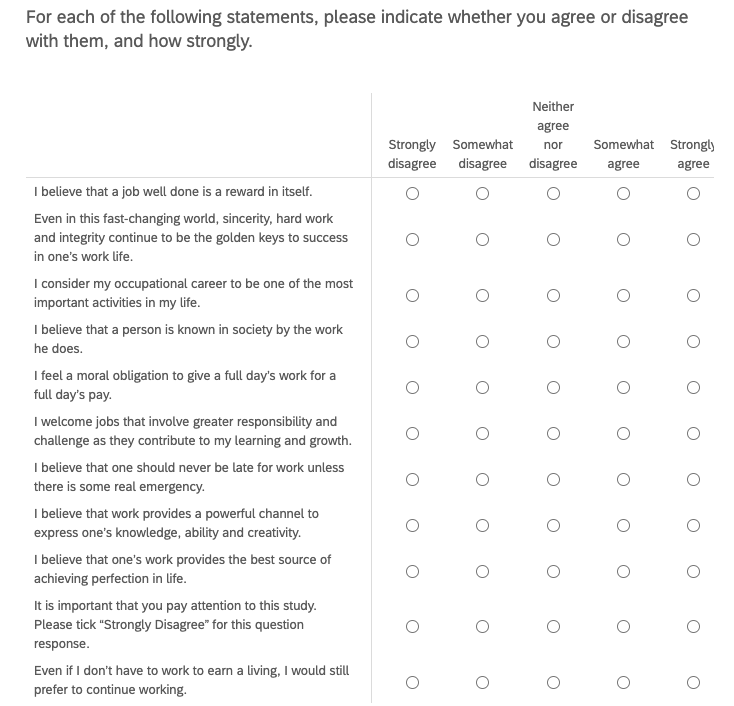

## Cleaning function

In [6]:
clean_data = function(df, numeric, detail, retest=FALSE){
    if(numeric){

        #### Check for survey completion
        x = length(df$PROLIFIC_PID) # length pre-cleaning step
        df = df[df$Progress=='100']
        if(detail){
            print(paste0('Removed ', x-length(df$PROLIFIC_PID), ' subjects who did not complete survey... ', length(df$PROLIFIC_PID), ' subjects remaining.'))
        }
        
        ### Check for duplicate subject ids
        if(detail){
            print(paste0('There were ', sum(duplicated(df$PROLIFIC_PID)), ' duplicated subjects:'))
            print(df$PROLIFIC_PID[duplicated(df$PROLIFIC_PID)])
        }
        # remove dupes
        x = length(df$PROLIFIC_PID) # length pre-cleaning step
        df = df[!duplicated(df$PROLIFIC_PID),]
        if(detail){
            print(paste0('Removed ', x-length(df$PROLIFIC_PID), ' instances where subjects completed the survey more than once... ',
                     length(df$PROLIFIC_PID), ' subjects remaining.'))
        }
        
        #### Remove subjects who don't agree to debrief
        x = length(df$PROLIFIC_PID) # length pre-cleaning step
        df = df[debrief_form_1 == '1' & debrief_form_2 == '1']
        if(detail){
            print(paste0('Removed ', x-length(df$PROLIFIC_PID), ' subjects who did not agree to debrief... ', length(df$PROLIFIC_PID), ' subjects remaining.'))
        }
        
        #### Attention check
        if (retest==FALSE){ # test retest did not have attention check
            if("attention_check" %in% colnames(df)){ # column changed naming
                # attention check requires answer of 'Strongly disagree' 
                x = length(df$PROLIFIC_PID) # length pre-cleaning step
                df = df[df$attention_check==1]
                if(detail){
                    print(paste0('Removed ', x-length(df$PROLIFIC_PID), ' subjects who failed attention check... ', length(df$PROLIFIC_PID), ' subjects remaining.'))
                }
            }
            if("bscs_attention" %in% colnames(df)){ # column changed naming
                # attention check requires answer of 'Strongly disagree' 
                x = length(df$PROLIFIC_PID) # length pre-cleaning step
                df = df[df$bscs_attention=='1']
                if(detail){
                    print(paste0('Removed ', x-length(df$PROLIFIC_PID), ' subjects who failed attention check... ', length(df$PROLIFIC_PID), ' subjects remaining.'))
                }
            }
            else{
                print("Warning! No attention check in data...")
            }
        }
        print(paste0('Number of cleaned subjects: ', length(df$PROLIFIC_PID)))
    }
    
    # NON NUMERIC
    else{
        #### Remove me (for some reason I am in the initial dfs...)
        df = df[df$id!='829',]

        #### Check for survey completion
        x = length(df$id) # length pre-cleaning step
        df = df[df$Progress=='100']
        if(detail){
            print(paste0('Removed ', x-length(df$id), ' subjects who did not complete survey... ', length(df$id), ' subjects remaining.'))
        }
        
        ### Check for duplicate subject ids
        if(detail){
            print(paste0('There were ', sum(duplicated(df$id)), ' duplicated subjects:'))
            print(df$id[duplicated(df$id)])
        }
        # remove dupes
        x = length(df$id) # length pre-cleaning step
        df = df[!duplicated(df$id),]
        if(detail){
            print(paste0('Removed ', x-length(df$id), ' instances where subjects completed the survey more than once... ',
                     length(df$id), ' subjects remaining.'))
        }
        
        #### Remove subjects who don't agree to debrief
        x = length(df$id) # length pre-cleaning step
        df = df[debrief_form_1 == 'Yes' & debrief_form_2 == 'Yes']
        if(detail){
            print(paste0('Removed ', x-length(df$id), ' subjects who did not agree to debrief... ', length(df$id), ' subjects remaining.'))
        }

        #### Attention check 
        if (retest==FALSE){ # test retest did not have attention check
            if("attention_check" %in% colnames(df)){ # column changed naming
            # attention check requires answer of 'Strongly disagree' 
                x = length(df$id) # length pre-cleaning step
                df = df[df$attention_check=='Strongly disagree']
                if(detail){
                    print(paste0('Removed ', x-length(df$id), ' subjects who failed attention check... ', length(df$id), ' subjects remaining.'))
                }
            }
            if("bscs_attention" %in% colnames(df)){ # column changed naming
                # attention check requires answer of 'Strongly disagree' 
                x = length(df$id) # length pre-cleaning step
                df = df[df$bscs_attention=='Strongly disagree']
                if(detail){
                    print(paste0('Removed ', x-length(df$id), ' subjects who failed attention check... ', length(df$id), ' subjects remaining.'))
                }
            }
            else{
                print("Warning! No attention check in data...")
            }
        }
        
        print(paste0('Number of cleaned subjects: ', length(df$id)))
    }
    return(df)
}

In [7]:
# SONA 4 (June 2022 edition)
# numeric
df = clean_data(df, numeric = TRUE, detail = TRUE)

[1] "Removed 0 subjects who did not complete survey... 52 subjects remaining."
[1] "There were 0 duplicated subjects:"
character(0)
[1] "Removed 0 instances where subjects completed the survey more than once... 52 subjects remaining."
[1] "Removed 0 subjects who did not agree to debrief... 52 subjects remaining."
[1] "Removed 1 subjects who failed attention check... 51 subjects remaining."
[1] "Number of cleaned subjects: 51"


---
Remove subjects who didn't pass the interaction question attention check
- told to evaluate all comparisions of a domain with itself as `neutral` (4)

In [8]:
# domain-domain interaction attention check
self_interact = ''

for(i in seq(34)){
    self_interact[i] = paste0(i, '_goal_interact_', i)
}

In [16]:
# all answers should be '4'
x = df %>%
    as_tibble() %>%
    select(ends_with(self_interact)) %>%
    select(starts_with(self_interact)) %>%
    sapply(as.numeric) %>%
    as_tibble() %>%
    rowMeans(na.rm=T)
x

[1] 4.000000 4.000000 1.000000 1.666667 4.000000 3.800000 4.000000 4.000000
 [9] 3.666667 4.000000 4.000000 4.000000 4.000000 4.000000 4.000000 4.000000
[17] 3.789474 4.000000 3.954545 3.750000 4.000000 2.695652 1.066667 2.000000
[25] 3.727273 4.000000 3.900000 4.000000 4.000000 4.000000 4.000000 4.000000
[33] 1.000000 1.000000 2.500000 4.000000 4.000000 4.000000 1.615385 1.230769
[41] 3.916667 4.000000 2.708333 3.681818 4.000000 4.000000 3.482759 4.000000
[49] 2.111111 1.000000 3.916667

In [17]:
# create index
good_subjects_idx = which(x==4)
# how many subjects left?
length(good_subjects_idx)

[1] 27

---
Removing subjects who took less than 45 minutes to complete. 
- in testing took me about 90 minutes

In [27]:
df$duration = as.numeric(df$`Duration (in seconds)`)/60

In [31]:
df_clean = df[good_subjects_idx,] %>%
    filter(duration>45) %>%
    as_tibble()

## Rename Domains

### Description

**NOTE:** 
- Added `Personal Values` and `Other` to the **June 2022** version of the measure
- Removed `Cleaning` as it correlated very highly with `Housework` and added `Hobby` not including those already listed as another category

### Rename Function

In [33]:
# number of domains
domain_num = df %>% select(contains('ib_domain_goal')) %>% as_tibble() %>% ncol()

In [34]:
rename_domains = function(df, domain_num){
    # list of domain categories
    ib_domain_cats = c('ambition', 'effort', 'external',
                       'goal', 'import', 'internal',
                       'rank', 'satis', 'source', 'specific',
                       'success', 'time'
                      )

    domain_names = c("Diet",
                     "Exercise",
                     "MentalPersonal_Health",
                     "Medical_Health",
                     "Sleep",
                     "Alcohol_drug",
                     "Online",
                     "Phone",
                     "Video games",
                     "Reading_leisure",
                     "SocialMedia",
                     "Sports_playing",
                     "TV_Streaming",
                     "Family",
                     "Friends",
                     "Partner",
                     "Social_life",
                     "Hobby",
                     "Housework",
                     "Cooking",
                     "Work_School",
                     "Environment",
                     "Culture",
                     "Learning",
                     "Self-Improvement",
                     "Volunteering",
                     "Community involvement",
                     "Admin",
                     "Future_Planning",
                     "Finances",
                     "Time_Management",
                     "Punctuality",
                     "Personal_Values",
                     "Other"
                    )

    for (i in 1:length(ib_domain_cats)) {
        # make a list of the existing names for each cateogry
        old_names = df %>%
            select(starts_with('ib_domain')) %>%
            select(contains(ib_domain_cats[i], ignore.case = FALSE)) %>%
            as_tibble() %>%
            names()

        # make a list of names with category and domain
        new_names = rep('ib_domain_', domain_num)
        new_names = paste0(new_names,ib_domain_cats[i], '_', domain_names)

        # replace existing names with new names
        df = df %>%
            rename_at(vars(all_of(old_names)), ~ new_names) %>%
            as_tibble()
    }

    return(df)
}

### Rename Domains for each DF

In [35]:
# sona IV
df_clean = rename_domains(df_clean, domain_num)

# Data Overview

In [37]:
# gender balance
df %>%
    select(gender) %>%
    group_by(gender) %>%
    summarise(n = n())

Source: local data table [2 x 2]
Call:   `_DT14`[, .(gender)][, .(n = .N), keyby = .(gender)]

  gender     n
  <chr>  <int>
1 1         18
2 2         33

# Use as.data.table()/as.data.frame()/as_tibble() to access results

In [39]:
#age
as.numeric(df$age)

[1] 27 48 31 70 24 42 61 60 22 32 42 51 51 56 37 37 40 20 68 47 58 30 26 39 29
[26] 42 67 31 40 36 28 19 41 24 52 55 24 22 29 34 44 43 36 62 28 36 34 39 35 27
[51] 21

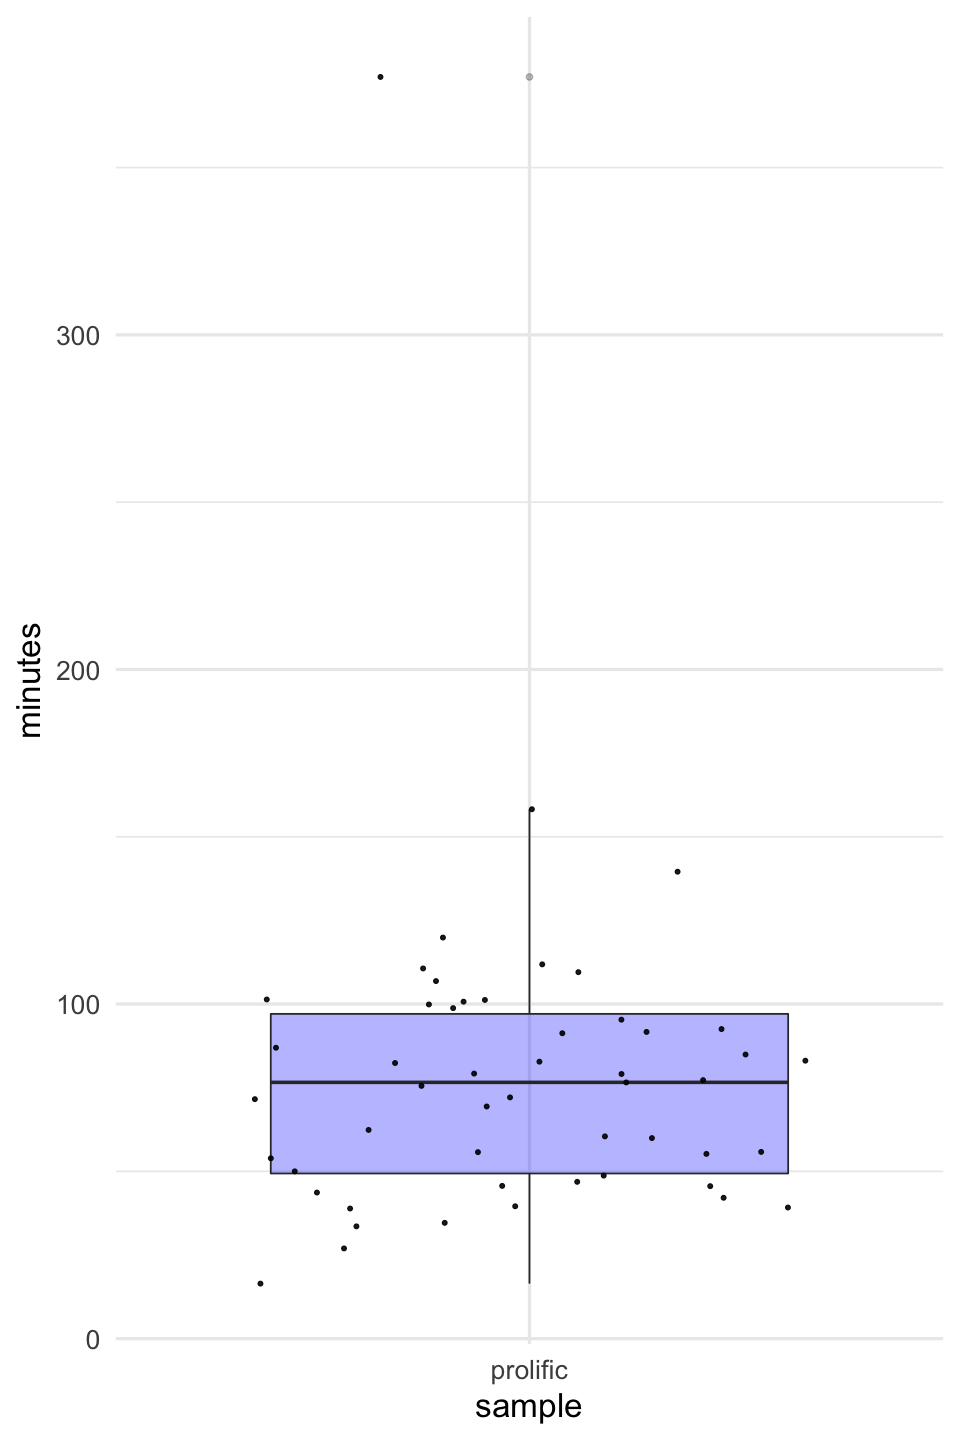

In [16]:
# timing
options(repr.plot.width = 8, repr.plot.height = 12)

df$sample = 'prolific'
df$duration = as.numeric(df$`Duration (in seconds)`)/60

ggplot(df, aes(x = sample, y = duration)) +
    geom_boxplot(fill='blue', alpha=0.3) +
    geom_jitter(color = 'black', size = 1, alpha = 0.9) +
    theme_minimal(base_size = 20) +
    ylab('minutes')
    
#     geom_violin(alpha = 0.5) +
#     geom_point(position = position_jitter(seed = 1, width = 0.2)) +
#     theme(legend.position = 'none')

In [40]:
#how many people chose each domain as a goal?

df_clean %>% 
    select(contains('ib_domain_goal')) %>% 
    as_tibble() %>%
    sapply(as.numeric) %>%
    rowSums()

[1]  5 18 10  9 13  3 17 10  3 16 28 21 24 20 18 16 25 25 25 20 18 24

In [18]:
# which domains were chosen?
df %>% 
    select(contains('ib_domain_goal')) %>% 
    as_tibble() %>%
    sapply(as.numeric) %>%
    colSums() %>%
    sort()

ib_domain_goal_Video games          ib_domain_goal_TV_Streaming 
                                   6                                    7 
                ib_domain_goal_Phone ib_domain_goal_Community involvement 
                                   9                                    9 
                ib_domain_goal_Other        ib_domain_goal_Sports_playing 
                                  10                                   11 
              ib_domain_goal_Culture          ib_domain_goal_Volunteering 
                                  12                                   12 
          ib_domain_goal_SocialMedia          ib_domain_goal_Alcohol_drug 
                                  13                                   15 
               ib_domain_goal_Online           ib_domain_goal_Environment 
                                  16                                   17 
                ib_domain_goal_Admin               ib_domain_goal_Partner 
                                  19                                   24 
                ib_domain_goal_Hobby           ib_domain_goal_Punctuality 
                                  24                                   25 
          ib_domain_goal_Social_life                 ib_domain_goal_Sleep 
                                  26                                   27 
              ib_domain_goal_Cooking       ib_domain_goal_Reading_leisure 
                                  27                                   28 
             ib_domain_goal_Learning               ib_domain_goal_Friends 
                                  29                                   30 
      ib_domain_goal_Personal_Values       ib_domain_goal_Time_Management 
                                  30                                   31 
ib_domain_goal_MentalPersonal_Health        ib_domain_goal_Medical_Health 
                                  33                                   33 
               ib_domain_goal_Family           ib_domain_goal_Work_School 
                                  33                                   36 
                 ib_domain_goal_Diet             ib_domain_goal_Housework 
                                  37                                   37 
     ib_domain_goal_Self-Improvement              ib_domain_goal_Finances 
                                  40                                   40 
             ib_domain_goal_Exercise       ib_domain_goal_Future_Planning 
                                  44                                   44

# Goal Domain Interactions

## Between Domain Conflict

In [41]:
domain_names = c("Diet",
                 "Exercise",
                 "MentalPersonal_Health",
                 "Medical_Health",
                 "Sleep",
                 "Alcohol_drug",
                 "Online",
                 "Phone",
                 "Video games",
                 "Reading_leisure",
                 "SocialMedia",
                 "Sports_playing",
                 "TV_Streaming",
                 "Family",
                 "Friends",
                 "Partner",
                 "Social_life",
                 "Hobby",
                 "Housework",
                 "Cooking",
                 "Work_School",
                 "Environment",
                 "Culture",
                 "Learning",
                 "Self-Improvement",
                 "Volunteering",
                 "Community involvement",
                 "Admin",
                 "Future_Planning",
                 "Finances",
                 "Time_Management",
                 "Punctuality",
                 "Personal_Values",
                 "Other"
                )

In [42]:
# create list of all pairwise interactions
all_interactions = NA
counter = 1

for (domain1 in domain_names){
    for (domain2 in domain_names){
        interaction = paste0(domain1, '_interact_', domain2)
        all_interactions[counter] = interaction
        counter=counter+1
    }
}

In [43]:
# select interaction columns from df
interaction_df = df_clean %>%
    select(contains('goal_interact')) %>%
    sapply(as.numeric) %>%
    as_tibble()

In [44]:
# rename columns
names(interaction_df) = all_interactions

**Domain Interaction Coding**

- 1 = very positive
- 4 = neutral
- 7 = very negative

In [45]:
# get count (non NAs)
df_int_n = as.data.frame.list(colSums(!is.na(interaction_df)))
# convert to df
df_int_n_long = gather(df_int_n, interaction, count, Diet_interact_Diet:Other_interact_Other)

# get mean pairwise domain conflict
df_int_val = as.data.frame.list(colMeans(interaction_df, na.rm=T))
# convert to df
df_int_val_long = gather(df_int_val, interaction, value, Diet_interact_Diet:Other_interact_Other)

# combine into single df
df_long = df_int_val_long
df_long$n = df_int_n_long$count
# reorder
df_long = df_long[order(-df_long$value),]

Warning message:
“Removed 31 rows containing missing values (position_stack).”
Warning message:
“Removed 31 rows containing missing values (geom_text).”


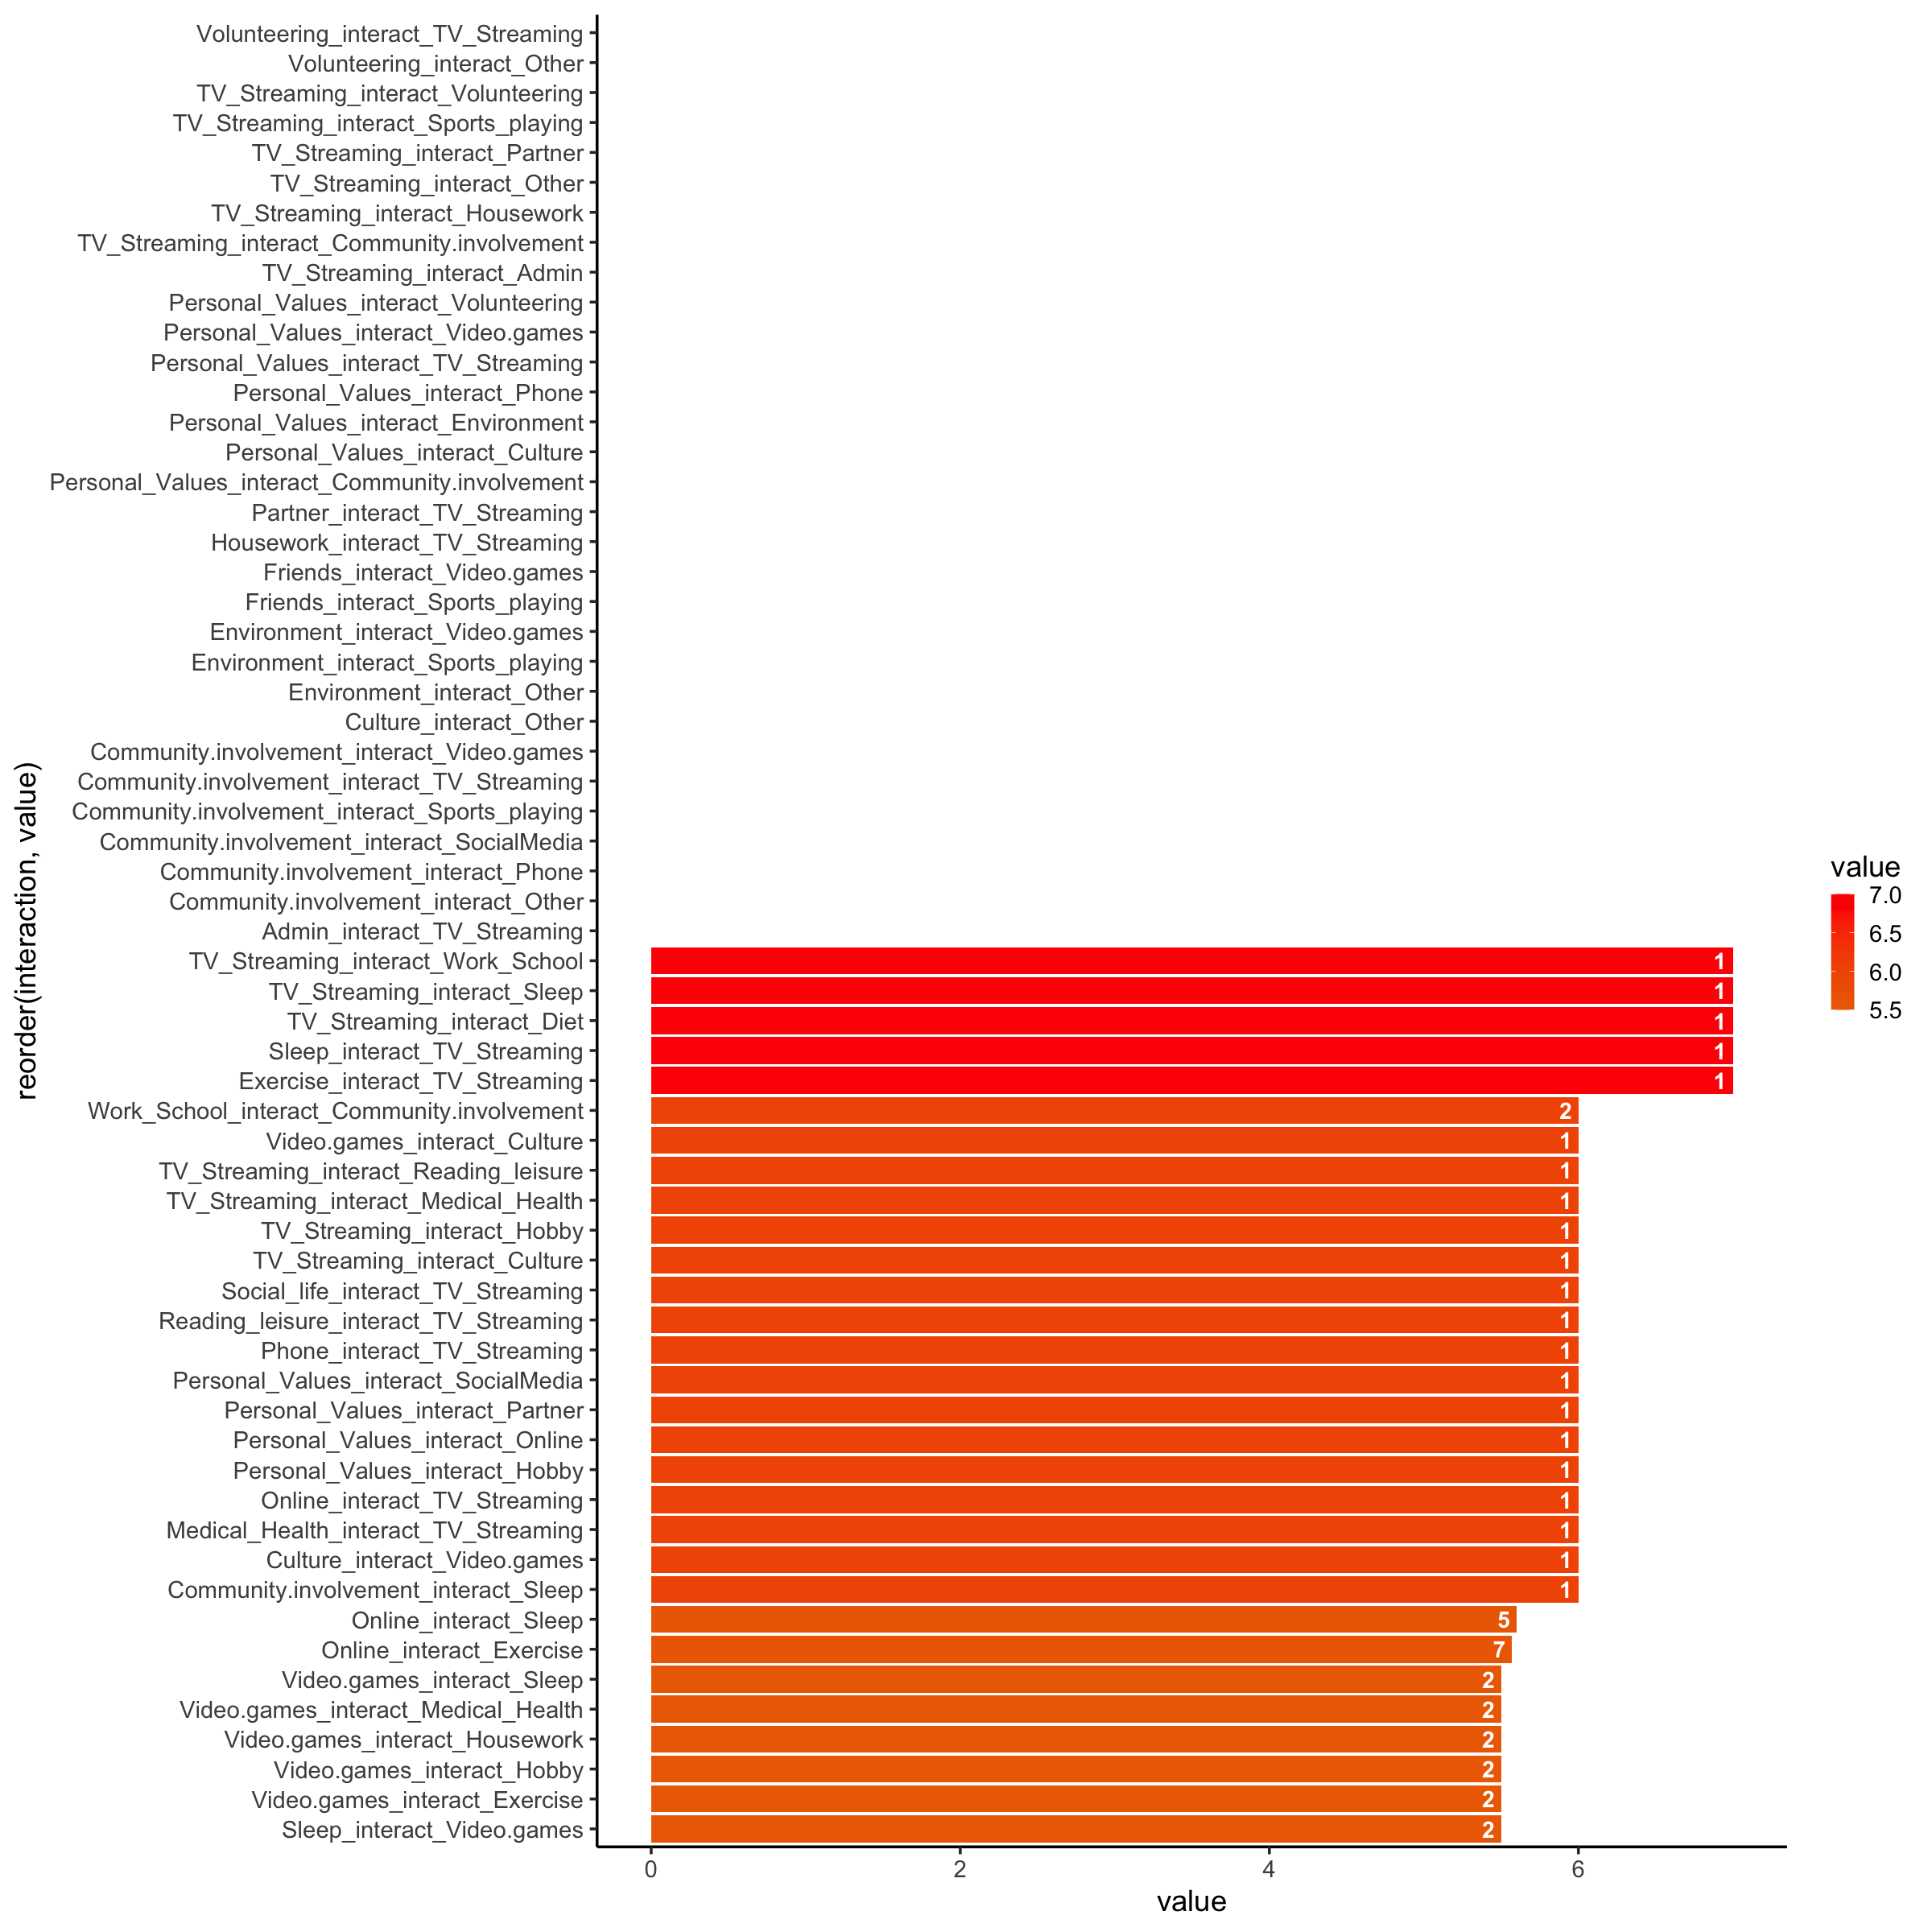

In [46]:
options(repr.plot.width = 20, repr.plot.height = 20)

ggplot(df_long[c(1:30, 1126:1156),], aes(x = reorder(interaction, value), y = value))+
  geom_bar(stat = 'identity', aes(fill = value)) +
    scale_fill_gradient2(mid='green', high='red') +
    geom_text(aes(label = n), hjust = 1.5, colour = 'white', fontface = "bold", size=6)+
    coord_flip() +
    theme_classic(base_size = 22)

## Within person goal conflict vs. IB Gap

In [47]:
avg_conflict = rowMeans(interaction_df, na.rm = T)

In [48]:
success = df_clean %>%
    select(contains('domain_success')) %>%
    sapply(as.numeric) %>%
    as_tibble() %>%
    rowMeans(na.rm=T)
gap = 100 - success

In [49]:
df_clean$avg_domain_conflict = avg_conflict
df_clean$ib_gap = gap

In [50]:
cor(avg_conflict, gap)

[1] -0.396566

In [51]:
summary(lm(ib_gap~avg_domain_conflict, data=df_clean))


Call:
lm(formula = ib_gap ~ avg_domain_conflict, data = df_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.217 -11.960  -3.236  12.416  30.863 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)          101.026     28.106   3.594  0.00181 **
avg_domain_conflict  -15.465      8.005  -1.932  0.06766 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.01 on 20 degrees of freedom
Multiple R-squared:  0.1573,	Adjusted R-squared:  0.1151 
F-statistic: 3.732 on 1 and 20 DF,  p-value: 0.06766


`geom_smooth()` using formula 'y ~ x'



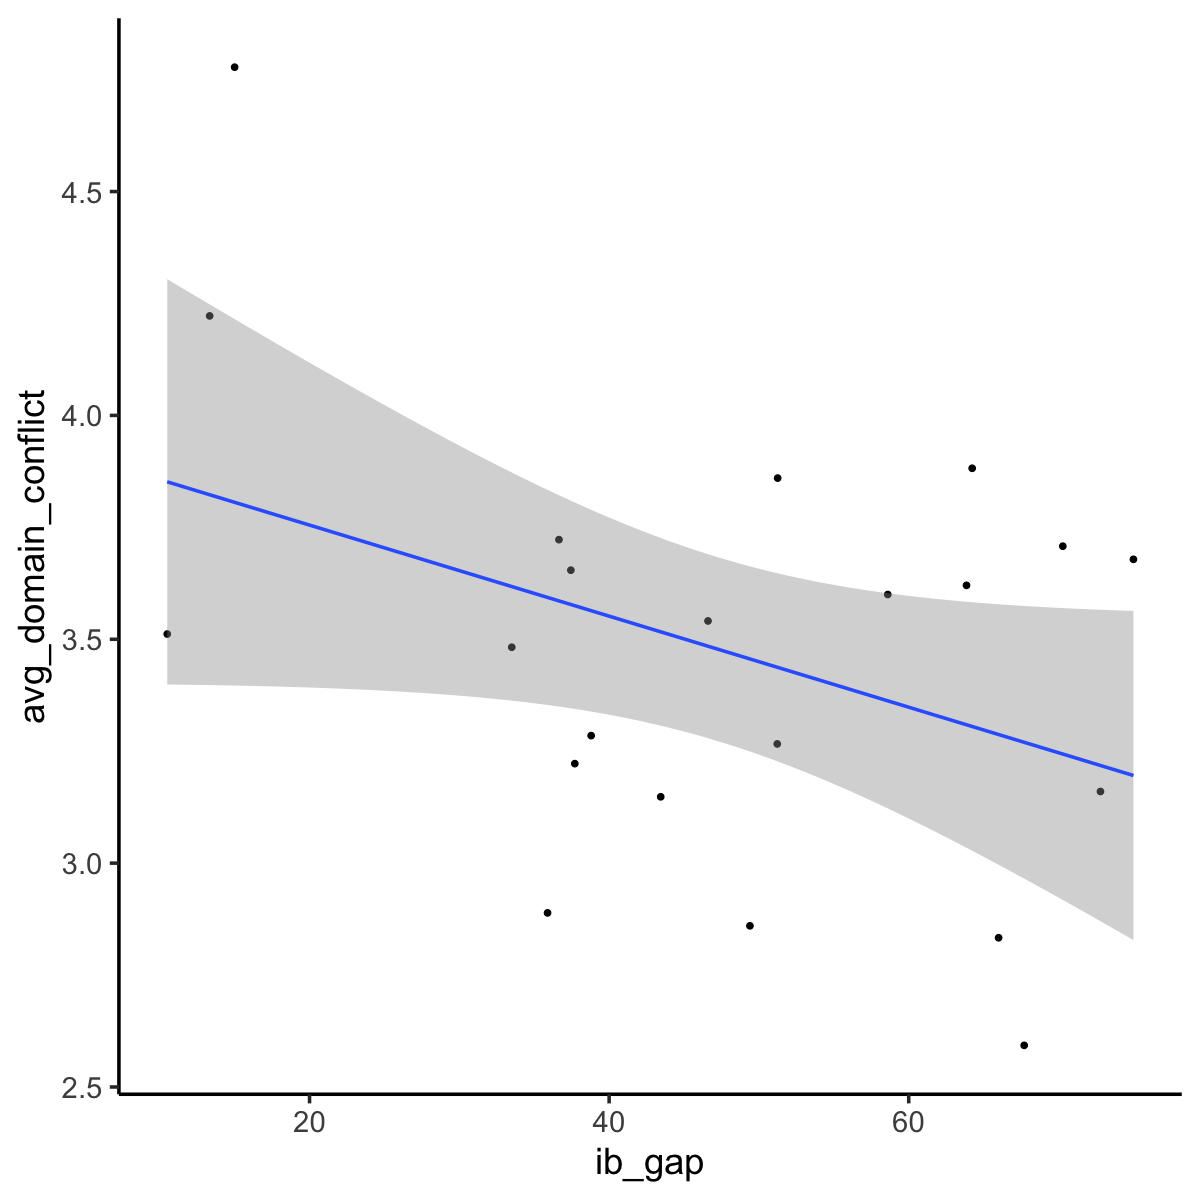

In [52]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df_clean, aes(x=ib_gap, y=avg_domain_conflict)) +
    geom_point() +
    stat_smooth(method = 'lm', se=TRUE) +
    theme_classic(base_size = 22)

In [31]:
# take 1 hour or more
summary(lm(ib_gap~avg_domain_conflict, data=df[df$duration>60,]))


Call:
lm(formula = ib_gap ~ avg_domain_conflict, data = df[df$duration > 
    60, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-35.307 -10.054   0.123  12.241  27.317 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           83.573     22.820   3.662 0.000957 ***
avg_domain_conflict  -10.754      6.633  -1.621 0.115407    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.46 on 30 degrees of freedom
Multiple R-squared:  0.08057,	Adjusted R-squared:  0.04992 
F-statistic: 2.629 on 1 and 30 DF,  p-value: 0.1154


In [181]:
# take 1 hour or more
summary(lm(ib_gap~avg_domain_conflict, data=df[df$duration>60,]))


Call:
lm(formula = ib_gap ~ avg_domain_conflict, data = df[df$duration > 
    60, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-35.307 -10.054   0.123  12.241  27.317 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           83.573     22.820   3.662 0.000957 ***
avg_domain_conflict  -10.754      6.633  -1.621 0.115407    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.46 on 30 degrees of freedom
Multiple R-squared:  0.08057,	Adjusted R-squared:  0.04992 
F-statistic: 2.629 on 1 and 30 DF,  p-value: 0.1154


In [190]:
# look between 70 and 100
test = df[df$duration<110,]
test = test[test$duration>65,]

In [191]:
summary(lm(ib_gap~avg_domain_conflict, data=test))


Call:
lm(formula = ib_gap ~ avg_domain_conflict, data = test)

Residuals:
   Min     1Q Median     3Q    Max 
-33.32  -9.90   1.72  10.34  30.39 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)          114.088     30.533   3.737  0.00114 **
avg_domain_conflict  -20.009      8.734  -2.291  0.03192 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.06 on 22 degrees of freedom
Multiple R-squared:  0.1926,	Adjusted R-squared:  0.1559 
F-statistic: 5.248 on 1 and 22 DF,  p-value: 0.03192


In [192]:
cor(test$avg_domain_conflict, test$ib_gap)

[1] -0.4388677

In [134]:
# domain-domain interaction attention check
self_interact = ''

for(i in seq(34)){
    self_interact[i] = paste0(i, '_goal_interact_', i)
}

In [135]:
df %>%
    select(contains('goal_interact')) %>%
    sapply(as.numeric) %>%
    as_tibble() %>%
    rowMeans(na.rm=T)

[1] 3.750000 3.944444 2.285714 2.062500 3.944444 3.403587 2.703125 3.811364
 [9] 3.890625 3.600000 3.148148 3.160000 2.888889 3.678571 4.777778 3.881944
[17] 3.479224 2.860000 3.711618 3.565000 4.222222 3.788194 3.075893 3.105263
[25] 2.902778 3.482213 3.590909 3.707908 3.620455 3.222222 3.860000 3.654321
[33] 3.423469 2.839335 2.685950 3.511719 3.284800 3.540931 2.809524 2.811034
[41] 3.912903 2.833333 3.599650 3.368530 3.722500 3.266254 2.760999 2.593043
[49] 3.493827 3.727273 4.236111

In [136]:
# all answers should be '4'
x = df %>%
    select(ends_with(self_interact)) %>%
    select(starts_with(self_interact)) %>%
    sapply(as.numeric) %>%
    as_tibble() %>%
    rowMeans(na.rm=T)
x

[1] 4.000000 4.000000 1.000000 1.666667 4.000000 3.800000 4.000000 4.000000
 [9] 3.666667 4.000000 4.000000 4.000000 4.000000 4.000000 4.000000 4.000000
[17] 3.789474 4.000000 3.954545 3.750000 4.000000 2.695652 1.066667 2.000000
[25] 3.727273 4.000000 3.900000 4.000000 4.000000 4.000000 4.000000 4.000000
[33] 1.000000 1.000000 2.500000 4.000000 4.000000 4.000000 1.615385 1.230769
[41] 3.916667 4.000000 2.708333 3.681818 4.000000 4.000000 3.482759 4.000000
[49] 2.111111 1.000000 3.916667

In [137]:
# create index
good_subjects_idx = which(x==4)
# how many subjects left?
length(good_subjects_idx)

[1] 27

In [142]:
good_subjects_df = df[good_subjects_idx,] %>%
    filter(duration>60)

In [141]:
summary(lm(ib_gap~avg_domain_conflict, data= good_subjects_df))


Call:
lm(formula = ib_gap ~ avg_domain_conflict, data = good_subjects_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.395 -13.686  -0.567  14.580  30.708 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)           90.308     26.989   3.346  0.00259 **
avg_domain_conflict  -11.793      7.626  -1.546  0.13455   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.08 on 25 degrees of freedom
Multiple R-squared:  0.08731,	Adjusted R-squared:  0.05081 
F-statistic: 2.392 on 1 and 25 DF,  p-value: 0.1346


# Validations

In [90]:
# Calculate height in CM
df_clean$height = as.numeric(df_clean$`height#1_1`) * 30.48 + as.numeric(df_clean$`height#2_1`) * 2.54

# note that there are some NAs as I had not set up the validation correctly. Should be fixed now...
# add bmi
df_clean$bmi = (as.numeric(df_clean$weight)/2.2) / (df_clean$height/100)^2

### Ambition

- 1: not at all like me
- 5: very much like me

In [91]:
df_clean$subjectID = 1:dim(df_clean)[1]

In [92]:
ambition <- select(df_clean, subjectID, starts_with("ambition")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

ambition_s = ambition %>%
  as_tibble() %>%
  mutate(ambition5_4 = 6 - ambition5_4r) %>%
  select(-ambition5_4r) %>%
  mutate(ambition_score = rowMeans(.[,c(2:dim(ambition)[2])])) %>%
  select(subjectID, ambition_score)

### Brief Self Control

- 1: not at all like me
- 5: very much like me
- Reverse-scored items: 2, 3, 4, 5, 7, 9, 10, 12, 13

In [93]:
briefSelfControl <- select(df_clean, subjectID, starts_with("bscs")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

briefSelfControl_s = briefSelfControl %>%
  as_tibble() %>%
  mutate(bscs_2 = 6 - bscs_2_r,
         bscs_3 = 6 - bscs_3_r,
         bscs_4 = 6 - bscs_4_r,
         bscs_5 = 6 - bscs_5_r,
         bscs_7 = 6 - bscs_7_r,
         bscs_9 = 6 - bscs_9_r,
         bscs_10 = 6 - bscs_10_r,
         bscs_12 = 6 - bscs_12_r,
         bscs_13 = 6 - bscs_13_r
         ) %>%
  select(-c(bscs_2_r,
            bscs_3_r,
            bscs_4_r,
            bscs_5_r,
            bscs_7_r,
            bscs_9_r,
            bscs_10_r,
            bscs_12_r,
            bscs_13_r)) %>%
  mutate(bscs_score = rowMeans(.[,c(2:dim(briefSelfControl)[2])], na.rm = T)) %>%
  select(subjectID, bscs_score)

### Conscientiousness HEX

[Link](https://docs.google.com/document/d/1b0WjZsNsMxHur6lm0tFo11LWIF7kCtC6WtYa6S6lGAc/edit)

- 1: strongly disagree
- 5: strongly agree

In [94]:
conscientiousness_hex <- select(df_clean, subjectID, starts_with("con_hex")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

conscientiousness_hex = as_tibble(conscientiousness_hex)
# select reversed score columns
cols = conscientiousness_hex %>% select(contains('r_')) %>% names()
# reverse their scores
conscientiousness_hex[, cols] = 6 - conscientiousness_hex[, cols]

In [95]:
conscientiousness_hex_s = conscientiousness_hex %>%
  mutate(con_hex_score = rowMeans(.[,c(2:dim(conscientiousness_hex)[2])], na.rm = T)) %>%
  select(subjectID, con_hex_score)

### DASS

[Link](https://docs.google.com/document/d/1E1LzJPFnKcuyetK2tGgdefJ5cU0s5zURTX679TCR5kc/edit#)

Scoring: 
- 0 Did not apply to me at all
- 1 Applied to me to some degree, or some of the time
- 2 Applied to me to a considerable degree, or a good part of time
- 3 Applied to me very much, or most of the time 

Note there is not a COMBINED DASS score, just the three subscales

In [96]:
dass <- select(df_clean, subjectID, starts_with("dass")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

dass = as_tibble(dass)
# no reverse scoring

In [97]:
# subscales
dass_depress = dass %>% select(ends_with('d')) %>% select(-subjectID) %>% rowMeans(na.rm = T)
dass_anxiety = dass %>% select(ends_with('a')) %>% rowMeans(na.rm = T)
dass_stress = dass %>% select(ends_with('s')) %>% rowMeans(na.rm = T)

# join
dass_s = tibble(dass_depress, dass_anxiety, dass_stress)
# add subject ID
dass_s$subjectID = 1:nrow(dass)

### Flourishing

[Link](https://docs.google.com/document/d/14yEdkOxY-wrde67vkZFGWRpXYQnvbM3VbkS-M4O61Io/edit)

**7 Point Likert**
1. Strongly disagree 
7. Strongly agree

No reverse scoring

In [98]:
flourishing <- select(df_clean, subjectID, starts_with("flourishing")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

In [99]:
flourishing_s = flourishing %>%
  as_tibble() %>%
  mutate(flourish_score = rowMeans(.[,c(2:dim(flourishing)[2])], na.rm = T)) %>%
  select(subjectID, flourish_score)

### Food Screener

[Link](https://docs.google.com/document/d/1kP5gELHH__i5chog26FsoMkZIh02cZrf8s1PFrIkesQ/edit#)

**Fruit & Vegetable Screener**: Likert 0-5
- 0 = less than 1/WEEK
- 1 = Once a WEEK
- 2 = 2-3 times a WEEK 
- 3 = 4-6 times a WEEK
- 4 = Once a DAY          
- 5 = 2+ a DAY

**Fat Screener**: Likert 0-4
- 0 = 1/MONTHor less     
- 1 = 2-3 times a MONTH     
- 2 = 1-2 times a WEEK 
- 3 = 3-4 times a WEEK
- 4 = 5+ times a WEEK

For scoring basically higher scores just mean you consume items in that category more frequently

No reverse scoring

In [100]:
food_screener <- select(df_clean, subjectID, starts_with("food")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

food_screener = as_tibble(food_screener)

In [101]:
# subscales
fat = food_screener %>% select(contains('fat')) %>% rowMeans(na.rm = T)
fruit_veg = food_screener %>% select(contains('fruit')) %>% rowMeans(na.rm = T)

# join
food_screener_s = tibble(fat, fruit_veg)
# add subject ID
food_screener_s$subjectID = 1:nrow(food_screener_s)

### Future Time Perspective

[Link](https://scienceofbehaviorchange.org/measures/future-time-perspective-scale/#:~:text=The%20Future%20Time%20Perspective%20(FTP,to%20make%20new%20plans%E2%80%9D).)

- 1: very untrue
- 7: very true
- Reverse-scored items: 8, 9, 10

Obtain the participant’s mean score of all 10 items. 

There are no defined cutoffs for interpreting FTP scores. 

Higher mean scores suggest a more expansive view of the future

In [102]:
futureTimePerspective <- select(df_clean, subjectID, starts_with("future")) %>% tbl_df_clean() %>% mutate_all(as.numeric) %>% data.table()

futureTimePerspective_s = futureTimePerspective %>%
  as_tibble() %>%
  mutate(future_time_8 = 8 - future_time_8,
         future_time_9 = 8 - future_time_9,
         future_time_10 = 8 - future_time_10
  ) %>%
  mutate(future_score = rowMeans(.[,c(2:dim(futureTimePerspective)[2])], na.rm = T)) %>%
  select(subjectID, future_score)

ERROR: Error in tbl_df_clean(.): could not find function "tbl_df_clean"


### Grit (Short)

[Link](https://docs.google.com/document/d/1LtIqQioBbtFEPGxC2CRPpZxa06E-f4bh88BLa7PjPM8/edit#heading=h.nsmwi64qqspq)

- 1: very much like me
- 5: not like me at all
- Reverse-scored items: 2, 4, 7, 8

Note: there are subscales which we are ignoring for the moment

In [103]:
gritShort <- select(df_clean, subjectID, starts_with("sgrit")) %>% tbl_df_clean() %>% mutate_all(as.numeric) %>% data.table()

gritShort_s = gritShort %>%
  as_tibble() %>%
  mutate(sgrit_2 = 6 - sgrit_2_r,
         sgrit_4 = 6 - sgrit_4_r,
         sgrit_7 = 6 - sgrit_7_r,
         sgrit_8 = 6 - sgrit_8_r
  ) %>%
  select(-c(sgrit_2_r,
            sgrit_4_r,
            sgrit_7_r,
            sgrit_8_r)) %>%
  mutate(grit_score = rowMeans(.[,c(2:dim(gritShort)[2])], na.rm = T)) %>%
  select(subjectID, grit_score)

ERROR: Error in tbl_df_clean(.): could not find function "tbl_df_clean"


### Harmony in Life

[Link](https://docs.google.com/document/d/1Fj-qJIvi43FleOg7lG7SXeIvGEtAYDy_MZUP8D2-fT0/edit#)

Emphasizes psychological balance and flexibility in life. 

**7 Point Likert**
- 7 - Strongly agree
- 1 - Strongly disagree 

No reverse scoring

In [104]:
harmony <- select(df_clean, subjectID, starts_with("harmony")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

In [105]:
harmony_s = harmony %>%
  as_tibble() %>%
  mutate(harmony_score = rowMeans(.[,c(2:dim(harmony)[2])], na.rm = T)) %>%
  select(subjectID, harmony_score)

### Need for Cognition

[Link](https://www.midss.org/sites/default/files/ncogscale.pdf)

- 1: extremely uncharacteristic of me
- 5: extremely characteristic of me
- Reverse scoring: 3, 4, 5 , 7, 8, 9, 12, 16, 17

Note: there are subscales which we are using

In [106]:
needForCognition <- select(df_clean, subjectID, starts_with("need_for")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

cols = needForCognition %>% select(ends_with('r')) %>% names()

In [107]:
needForCognition <- select(df_clean, subjectID, starts_with("need_for_cognition")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

needForCognition = as_tibble(needForCognition)
# select reversed score columns
cols = needForCognition %>% select(ends_with('r')) %>% names()
# reverse their scores
needForCognition[, cols] = 6 - needForCognition[, cols]

In [108]:
needForCognition_s = needForCognition %>%
  mutate(needForCognition_score = rowMeans(.[,c(2:dim(needForCognition)[2])], na.rm = T)) %>%
  select(subjectID, needForCognition_score)

### Quality of Life

[Link](https://docs.google.com/document/d/1_j2ziDtn_QfTM7Ow07-BB72OgbZ4yjplGwO2Y9i6aYw/edit#)

> The QOLS is a valid instrument for measuring quality of life across patient groups and cultures and is conceptually distinct from health status or other causal indicators of quality of life.


**7 Point Likert**
- 7 - Delighted
- 6 - Pleased
- 5 - Mostly Satisfied
- 4 - Mixed
- 3 - Mostly Dissatisfied
- 2 - Unhappy
- 1 - Terrible

No reverse scoring

In [109]:
qualityLife <- select(df_clean, subjectID, starts_with("qol")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

In [110]:
qualityLife_s = qualityLife %>%
  as_tibble() %>%
  mutate(qualityLife_score = rowMeans(.[,c(2:dim(qualityLife)[2])], na.rm = T)) %>%
  select(subjectID, qualityLife_score)

### SWL Cantril

This was originally reverse coded for the `SONA1` cohort, then was fixed for `SONA2` cohort...

Therefore need to reverse the scores for those who were in `SONA1`

Did it auto-fix when re-exporting??

In [111]:
SWLCantril <- select(df_clean, subjectID, starts_with("swl_cantril")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

### SWLS (5)

[Link](https://docs.google.com/document/d/1Rp-afpwpUtZTr6t_I5gcXyKvUpUix2GYbQ0viIJAbcM/edit)

- 1: strongly disagre
- 7: strongly agree
- no reverse scoring

In [112]:
SWL5 <- select(df_clean, subjectID, starts_with("swl_scale")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

SWL5_s = SWL5 %>%
  as_tibble() %>%
  mutate(SWL5_score = rowMeans(.[,c(2:dim(SWL5)[2])], na.rm = T)) %>%
  select(subjectID, SWL5_score)

### Secular Work Ethic

[Link](https://docs.google.com/document/d/1_95yYfsq3ndeS64wiNp2tyO7cyRsLIbJGfE9wgqBcGo/edit#heading=h.l4lr03cu53fh)

- 1: strongly disagree
- 5: strongly agree
- Reverse-scored items: none

Note: there are subscales which we are ignoring for the moment

In [113]:
secWorkEthic <- select(df_clean, subjectID, starts_with("smwe")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

secWorkEthic_s = secWorkEthic %>%
  as_tibble() %>%
  mutate(workEthic_score = rowMeans(.[,c(2:dim(secWorkEthic)[2])], na.rm = T)) %>%
  select(subjectID, workEthic_score)

### Self Esteem

Single item measure so don't need to calculate

In [114]:
selfEsteemSingle <- select(df_clean, subjectID, starts_with("self_esteem")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

### Social Desirability

[Link](https://docs.google.com/document/d/176SizGcg7u4SyskMlSAPxifTxk53i1GeEPeSbW4XE6s/edit#)

> A high score indicates a social desirability response tendency

**True/False**
- T=1, F=2)
- Reverse score the following items: 5, 7, 9, 10, 13

In [115]:
socialD <- select(df_clean, subjectID, starts_with("social")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

In [116]:
socialD = as_tibble(socialD)
# select reversed score columns
cols = socialD %>% select(ends_with('r')) %>% names()
# reverse their scores
socialD[, cols] = 3 - socialD[, cols]

In [117]:
socialD_s = socialD %>%
  mutate(socialD_score = rowMeans(.[,c(2:dim(socialD)[2])], na.rm = T)) %>%
  select(subjectID, socialD_score)

### Subjective Happiness

[Link](https://docs.google.com/document/d/1QHS7y2EYv66X6khnsYcfYEAklRmmf1N9lF8lpaYkLlQ/edit)

> global subjective happiness. 

> Two items ask respondents to characterize themselves using both absolute ratings and ratings relative to peers, whereas the other two items offer brief descriptions of happy and unhappy individuals and ask respondents the extent to which each characterization describes them. 

- 1: Not at all
- 7: A great deal
- Reverse scoring: 4

In [118]:
subjectHappy <- select(df_clean, subjectID, starts_with("happiness")) %>% as_tibble() %>% mutate_all(as.numeric) %>% data.table()

subjectHappy = as_tibble(subjectHappy)
# select reversed score columns
cols = subjectHappy %>% select(ends_with('r')) %>% names()
# reverse their scores
subjectHappy[, cols] = 6 - subjectHappy[, cols]

In [119]:
subjectHappy_s = subjectHappy %>%
  mutate(subjectHappy_score = rowMeans(.[,c(2:dim(subjectHappy)[2])], na.rm = T)) %>%
  select(subjectID, subjectHappy_score)

### Join Scales

In [120]:
rm(validation_measures)

In [121]:
validation_measures = merge(ambition_s, briefSelfControl_s, by = 'subjectID') %>%

  merge(conscientiousness_hex_s, by= 'subjectID') %>%
  merge(dass_s, by= 'subjectID') %>%
  merge(flourishing_s, by= 'subjectID') %>%
  merge(food_screener_s, by= 'subjectID') %>%
  merge(futureTimePerspective_s, by= 'subjectID') %>%
  merge(gritShort_s, by= 'subjectID') %>%
  merge(harmony_s, by= 'subjectID') %>%
  merge(needForCognition_s, by= 'subjectID') %>%
  merge(qualityLife_s, by= 'subjectID') %>%
  merge(SWLCantril, by= 'subjectID') %>%
  merge(SWL5_s, by= 'subjectID') %>%
  merge(secWorkEthic_s, by= 'subjectID') %>%
  merge(selfEsteemSingle, by= 'subjectID') %>%
  merge(socialD_s, by= 'subjectID') %>%
  merge(subjectHappy_s, by= 'subjectID')


In [122]:
validation_measures$gap = df_clean$ib_gap
validation_measures$avg_domain_conflict = df_clean$avg_domain_conflict

In [123]:
options(repr.plot.width = 24, repr.plot.height = 20)

cor.plot(select(validation_measures, -subjectID), cex = 1, xlas = 2, stars = TRUE, diag = FALSE, cex.axis = 1, MAR=7.5)

ERROR: Error in seq.int(0, 1, length.out = n): 'length.out' must be a non-negative number


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



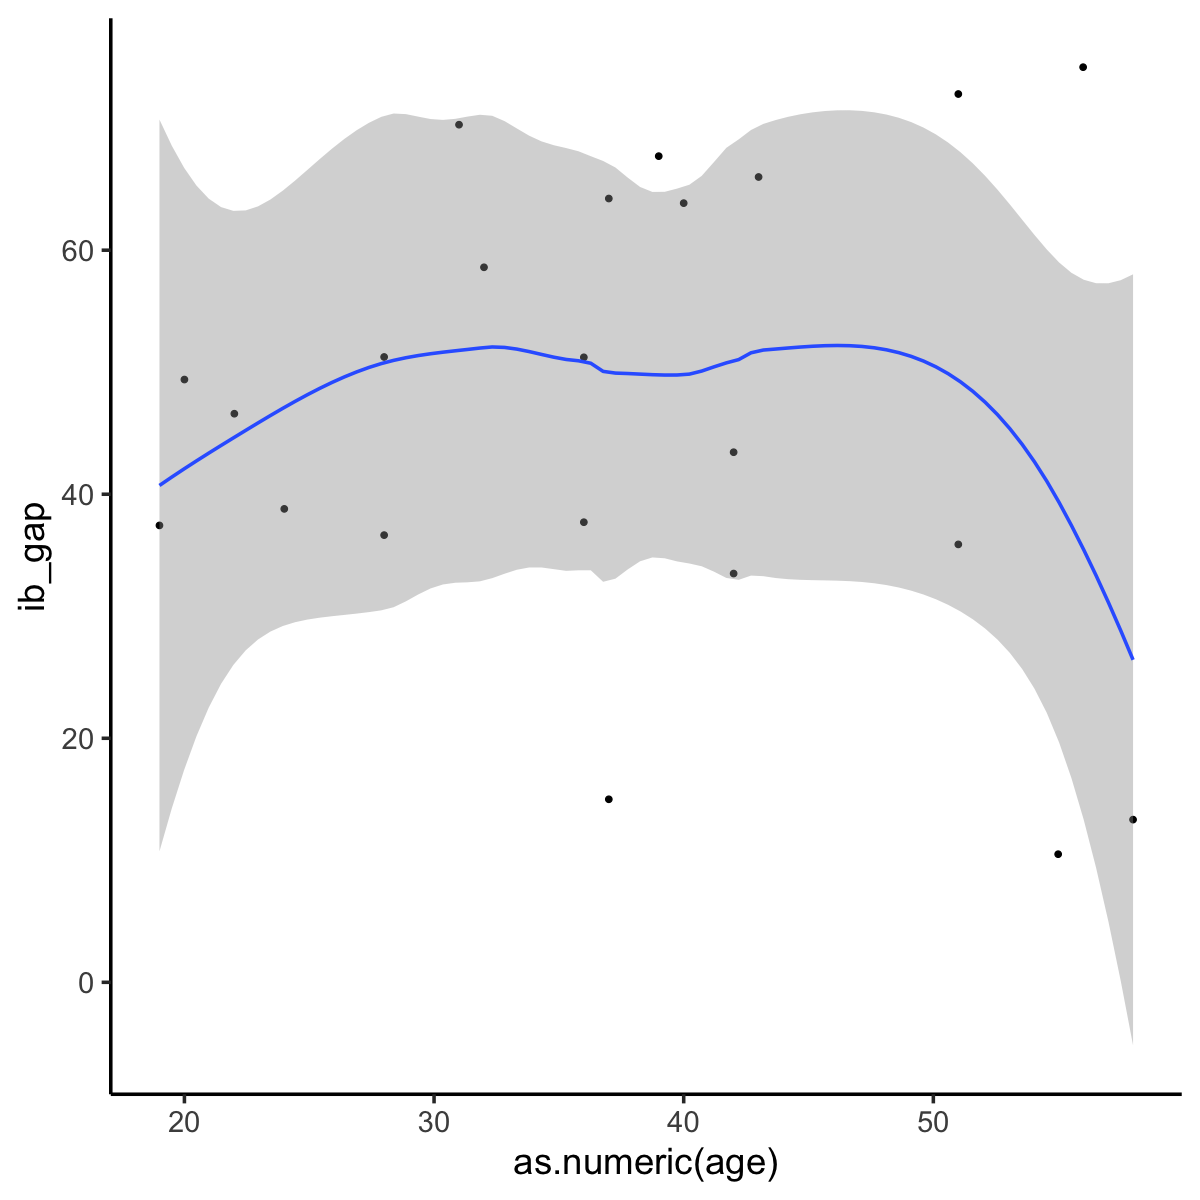

In [124]:
# age
options(repr.plot.width = 10, repr.plot.height = 10)


ggplot(df_clean, aes(as.numeric(age), ib_gap)) +
  geom_point() +
  geom_smooth() + 
    theme_classic(base_size = 22)

`geom_smooth()` using formula 'y ~ x'



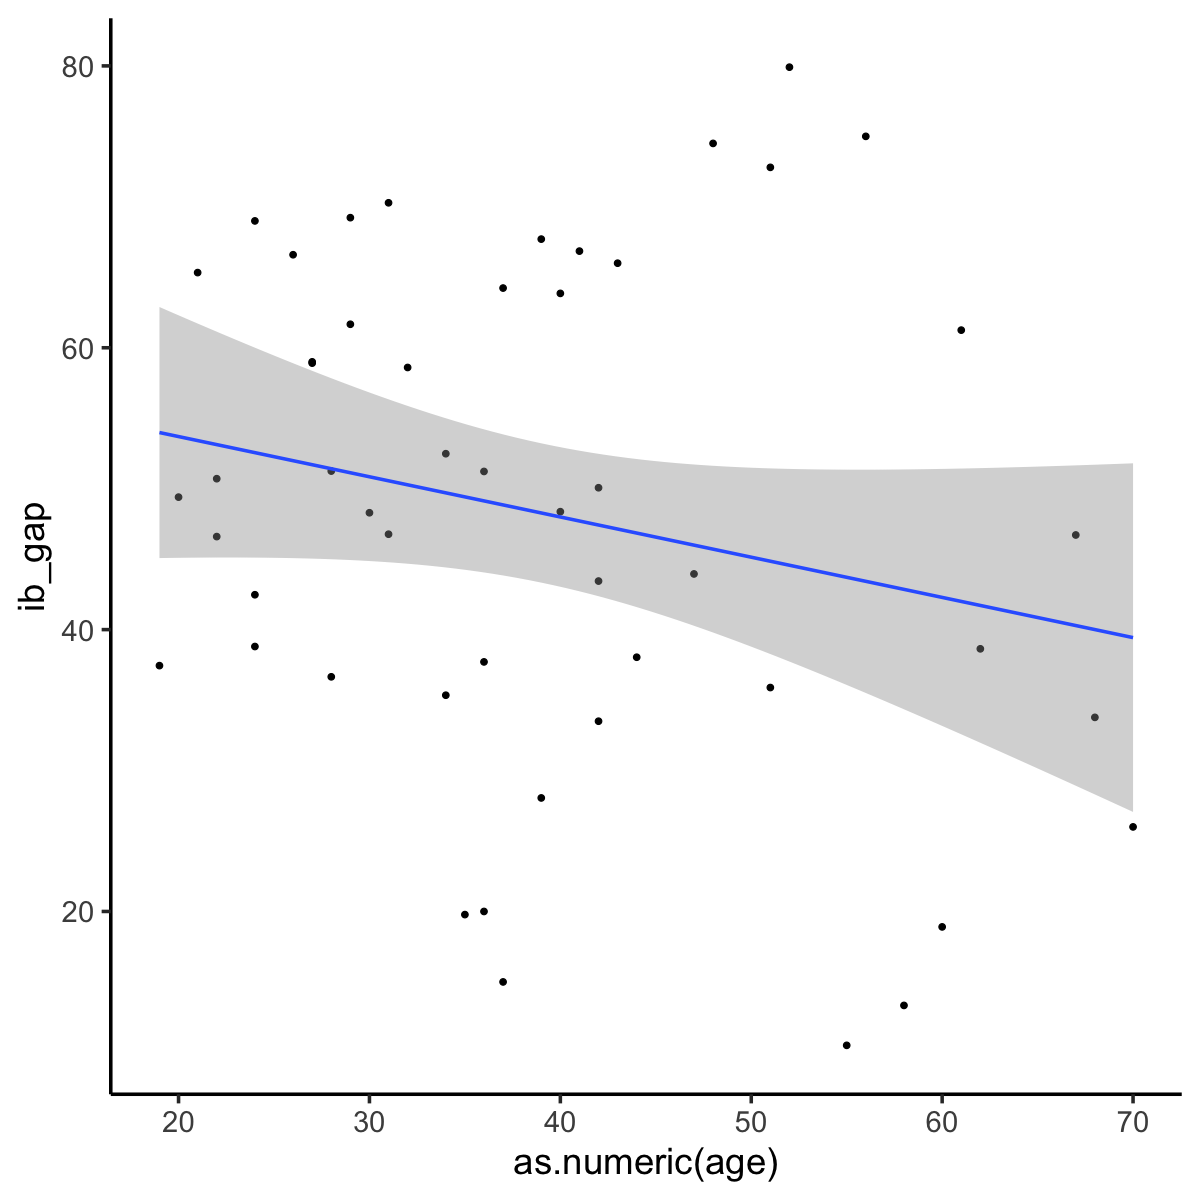

In [127]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df, aes(x=as.numeric(age), y=ib_gap)) +
    geom_point() +
    stat_smooth(method = 'lm', se=TRUE) +
    theme_classic(base_size = 22)

In [144]:
summary(lm(ib_gap ~ as.numeric(age), data=df))


Call:
lm(formula = ib_gap ~ as.numeric(age), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.848 -12.428  -2.044  15.001  35.341 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      59.4048     7.5738   7.843 3.32e-10 ***
as.numeric(age)  -0.2853     0.1829  -1.560    0.125    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.56 on 49 degrees of freedom
Multiple R-squared:  0.0473,	Adjusted R-squared:  0.02785 
F-statistic: 2.433 on 1 and 49 DF,  p-value: 0.1253


---
**How do we feel about the gap...not good...**

`geom_smooth()` using formula 'y ~ x'



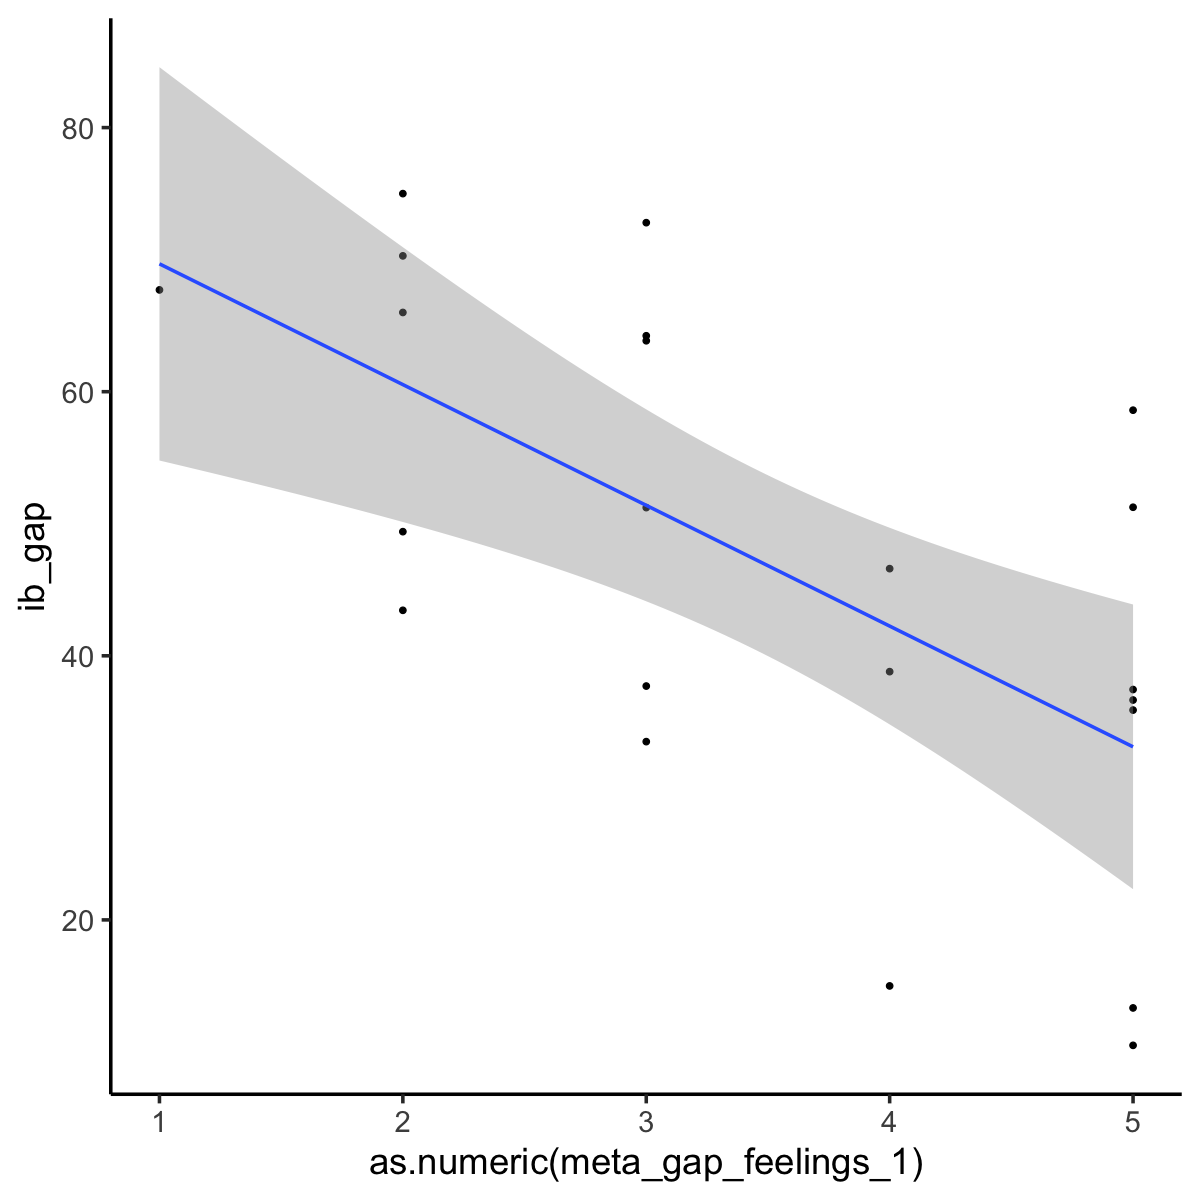

In [125]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df_clean, aes(x=as.numeric(meta_gap_feelings_1), y=ib_gap)) +
    geom_point() +
    stat_smooth(method = 'lm', se=TRUE) +
    theme_classic(base_size = 22)

In [146]:
summary(lm(as.numeric(meta_gap_feelings_1) ~ ib_gap, data=df))


Call:
lm(formula = as.numeric(meta_gap_feelings_1) ~ ib_gap, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89482 -0.71213  0.02784  0.63526  2.33430 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.273427   0.443674  11.886 4.80e-16 ***
ib_gap      -0.039004   0.008639  -4.515 3.99e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.088 on 49 degrees of freedom
Multiple R-squared:  0.2938,	Adjusted R-squared:  0.2794 
F-statistic: 20.38 on 1 and 49 DF,  p-value: 3.991e-05


In [148]:
cor(as.numeric(df$meta_gap_feelings_1), df$ib_gap)

[1] -0.5420156

In [ ]:
# use DASS as control

In [150]:
validation_measures$dass_depress

[1] 0.0000000 0.4285714 0.0000000 0.1428571 2.5714286 1.5714286 1.8571429
 [8] 0.0000000 0.0000000 0.2857143 1.5714286 1.7142857 0.1428571 2.2857143
[15] 0.0000000 1.0000000 0.1428571 0.0000000 0.1428571 1.1428571 0.0000000
[22] 0.2857143 2.4285714 1.4285714 0.8571429 0.5714286 0.7142857 1.5714286
[29] 2.5714286 0.1428571 0.1428571 1.0000000 1.5714286 0.1428571 1.5714286
[36] 0.4285714 0.1428571 1.8571429 0.8571429 2.7142857 1.7142857 1.1428571
[43] 0.0000000 0.0000000 1.5714286 2.4285714 0.4285714 0.7142857 2.1428571
[50] 0.0000000 0.0000000

In [155]:
model_ibGap = lm(gap ~ dass_depress, data = validation_measures)

In [153]:
residuals(model_ibGap)

1           2           3           4           5           6 
 17.8817310  30.0119944   5.6509618 -16.2415146   7.6633113  -3.4073033 
          7           8           9          10          11          12 
  5.5295390 -22.2135071   9.5900643  15.2352399 -10.0295255  18.2027845 
         13          14          15          16          17          18 
 -6.3526257  15.9098024 -26.1182690  15.2543063   6.1269065   8.2817310 
         19          20          21          22          23          24 
 -8.4687873  -6.1542333 -27.7849357   4.9269066   6.3865568 -24.2951688 
         25          26          27          28          29          30 
 13.8089244 -12.1112512  -0.0202110  16.8117443   2.5204541  -4.5331812 
         31          32          33          34          35          36 
  9.0084854 -11.5365433  13.3831729   0.2321697  26.4351210 -33.9880056 
         37          38          39          40          41          42 
 -3.4415146  -9.1204610  21.3730270  -9.9784528 -16.5572155  15.8957667 
         43          44          45          46          47          48 
-21.1182690  -2.4819054 -16.8239699  -8.9912209  -9.1431780  20.9738366 
         49          50          51 
-38.1891743  17.7908219  24.2150643

In [156]:
validation_measures$gap_dass_resid = residuals(model_ibGap)

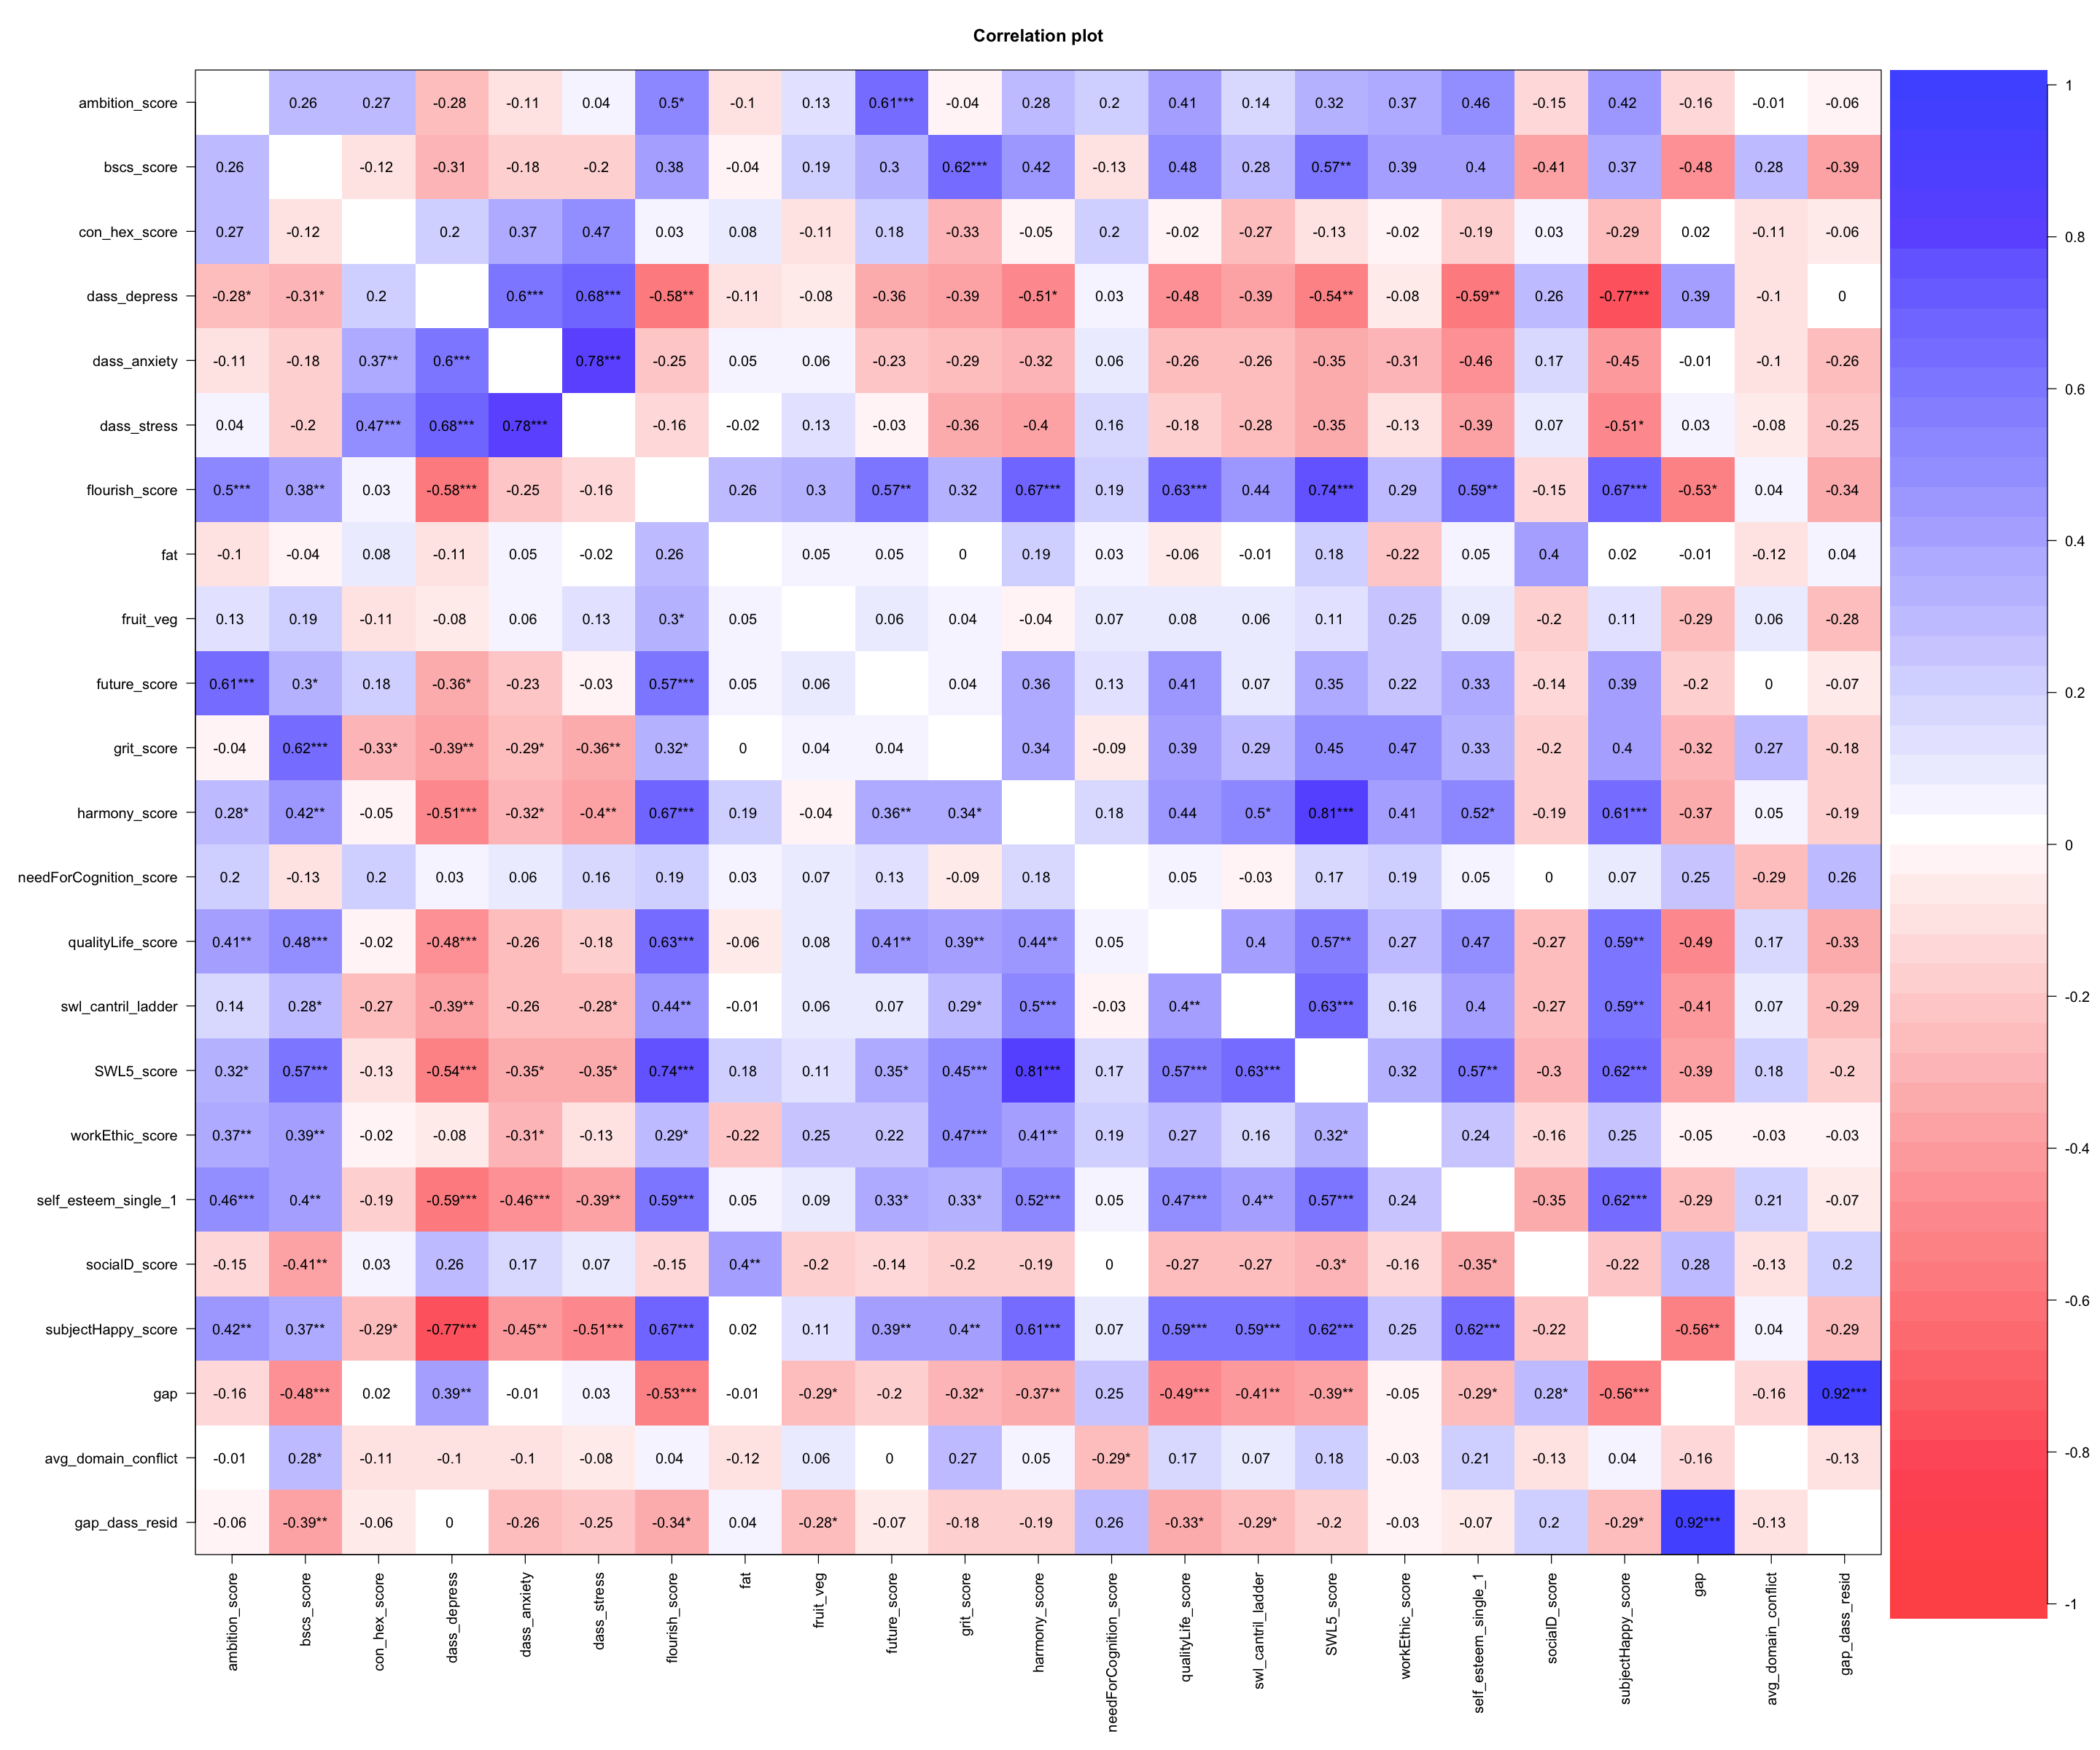

In [157]:
options(repr.plot.width = 24, repr.plot.height = 20)

cor.plot(select(validation_measures, -subjectID), cex = 1, xlas = 2, stars = TRUE, diag = FALSE, cex.axis = 1, MAR=7.5)

In [ ]:
what is most highly correlated with pc1/2 for predictors and outcomes?

# Save Data

In [135]:
valid_pro = validation_measures

In [136]:
interact_pro = interaction_df

In [137]:
clean_pro = df_clean

In [138]:
write.csv(valid_pro, "../../3_1_2_processed_data/valid_pro.csv", row.names = FALSE)
write.csv(interact_pro, "../../3_1_2_processed_data/interact_pro.csv", row.names = FALSE)
write.csv(clean_pro, "../../3_1_2_processed_data/clean_pro.csv", row.names = FALSE)